<a href="https://colab.research.google.com/github/JULIANNEBBORGES/CHALLENGE_ALURA_STORE/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 👩‍💻 CHALLENGE ALURA STORE BR
>>  👩‍💻 Data Science<br>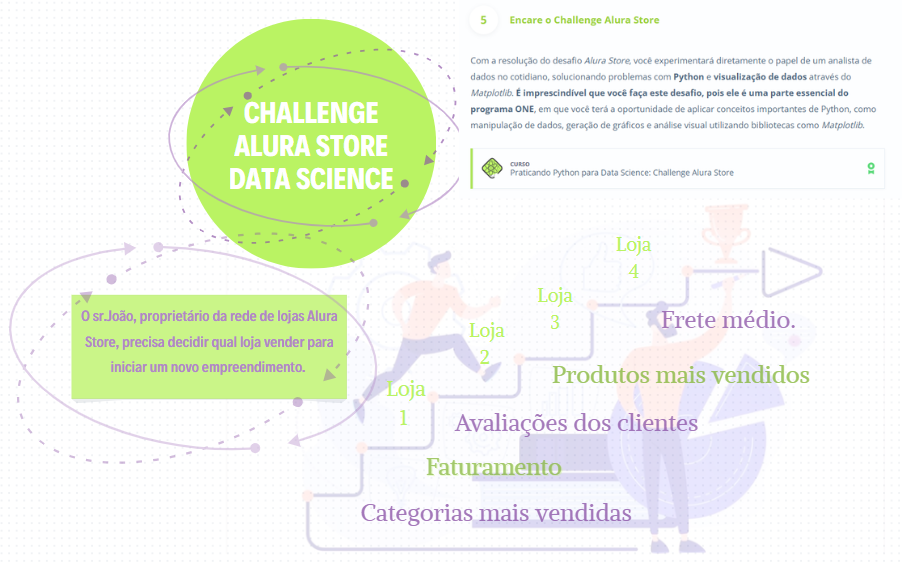

>> [challenge-alura-store](https://cursos.alura.com.br/course/praticando-python-data-science-challenge-alura-store.)



---



## 👩‍💻 Preparação do ambiente:

>⬇️ Importação das bibliotecas necessárias para resolução do desafio.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium.plugins import HeatMap
from IPython.display import display
from google.colab import files



---



> ⬇️ Configurações para melhorar a visualização dos gráficos

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
sns.set(style="whitegrid")



---



> ⬇️ Importação dos dados



In [3]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)



---



> ⬇️ Adicionando identificador para cada loja

In [4]:
loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

> 📚 Sobre o código: <br>

>> Objetivo: <br>
>> Identificar cada conjunto de dado com o nome da loja correspondente. A adição da coluna `Loja` organiza os dados de fomar mais estruturada, contribuindo para uma visualização e análise dos dados mais efetiva de cada unidade de negócio e sua representatividade na avaliação combinada dos dados. <br>

>> Descritivo do código <br>
`loja.1. loja1['Loja'] = 'Loja 1'`

>> Lógica: <br>
  `loja1`: Representa o DataFrame que contém os dados da Loja 1. <br>
  `['Loja']`: Acessa a coluna 'Loja' (que será criada).<br>
= `'Loja 1'` Atribui o valor 'Loja 1' a todas as linhas da nova coluna 'Loja' no DataFrame loja1.<br>

>> O mesmo raciocínio se aplica aos demais conjunto de dados.




---



> ⬇️ Verificando a estrutura dos dados

In [5]:
print("Estrutura dos dados da Loja 1:")
print("------------------------------")
print(loja1.info())
print("\nPrimeiras linhas da Loja 1:")
print("---------------------------")
display(loja1.head())

Estrutura dos dados da Loja 1:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
 12  Loja                    2359 non-null   object 
dtypes: float64(4), int64(2), object

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1




---



> ⬇️ Combinando os dados de todas as lojas

In [6]:
dados_completos = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)



---



> ⬇️ Verificando e Explorando os Dados Combinados.

In [7]:
print("\nEstrutura dos dados combinados:")
print("---------------------------------")
print(dados_completos.info())
print("\nResumo estatístico dos dados numéricos:")
print("---------------------------------------")
display(dados_completos.describe())


Estrutura dos dados combinados:
---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 9435 non-null   object 
 1   Categoria do Produto    9435 non-null   object 
 2   Preço                   9435 non-null   float64
 3   Frete                   9435 non-null   float64
 4   Data da Compra          9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Local da compra         9435 non-null   object 
 7   Avaliação da compra     9435 non-null   int64  
 8   Tipo de pagamento       9435 non-null   object 
 9   Quantidade de parcelas  9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Loja                    9435 non-null   object 
dtypes: float64(4), int64(2), o

,Preço,Frete,Avaliação da compra,Quantidade de parcelas,lat,lon
count,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000
mean,622.309570,33.167002,4.014520,2.927398,-20.534059,-47.171176
std,787.094508,41.973711,1.390518,2.802776,5.399153,4.177887
min,10.070000,0.000000,1.000000,1.000000,-30.170000,-70.550000
25%,73.610000,4.009423,3.000000,1.000000,-22.250000,-48.790000
50%,295.350000,15.648481,5.000000,1.000000,-22.190000,-48.790000
75%,884.405000,46.591030,5.000000,4.000000,-18.100000,-44.380000
max,3969.380000,216.707633,5.000000,24.000000,1.990000,-36.590000




---



> ⬇️ Verificando valores ausentes

In [8]:
print(" ⬇️ Valores ausentes por coluna:")
display(dados_completos.isnull().sum())

 ⬇️ Valores ausentes por coluna:


,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Data da Compra,0
Vendedor,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0




---



## 👩‍💻 Faturamento

In [9]:
print("⬇️ Análise do faturamento.")
print()
print("↪️ Criando função para calcular o faturamento total de cada loja.")
print()

def calcular_faturamento(dados):
    faturamento = dados.groupby('Loja')['Preço'].sum().reset_index()
    faturamento.columns = ['Loja', 'Faturamento']
    return faturamento

faturamento_lojas = calcular_faturamento(dados_completos)
print("\nFaturamento total por loja:")
print("----------------------------")
display(faturamento_lojas)

⬇️ Análise do faturamento.

↪️ Criando função para calcular o faturamento total de cada loja.


Faturamento total por loja:
----------------------------


,Loja,Faturamento
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58




---



⬇️ Visualização do faturamento através do método gráfico de barras.



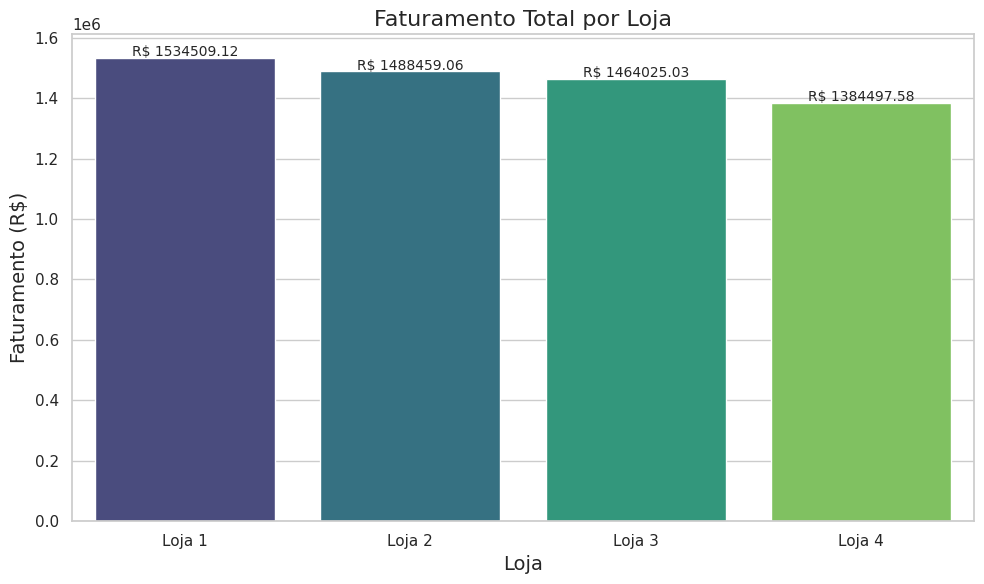

In [10]:
print("⬇️ Visualização do faturamento através do método gráfico de barras.")
print()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Loja', y='Faturamento', data=faturamento_lojas, hue='Loja', palette='viridis', legend=False)
plt.title('Faturamento Total por Loja', fontsize=16)
plt.xlabel('Loja', fontsize=14)
plt.ylabel('Faturamento (R$)', fontsize=14)

# Adicionando valores nas barras
for i, valor in enumerate(faturamento_lojas['Faturamento']):
    ax.text(i, valor + 5000, f'R$ {valor:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()



---



## 👩‍💻 Vendas por Categoria

In [11]:
print("⬇️ Criando função para analisar vendas por categoria.")

def analisar_categorias(dados):
    categorias_por_loja = dados.groupby(['Loja', 'Categoria do Produto']).size().reset_index(name='Quantidade')
    return categorias_por_loja

categorias_vendas = analisar_categorias(dados_completos)
print("\nQuantidade de vendas por categoria em cada loja:")
print("-------------------------------------------------")
display(categorias_vendas)


⬇️ Criando função para analisar vendas por categoria.

Quantidade de vendas por categoria em cada loja:
-------------------------------------------------


,Loja,Categoria do Produto,Quantidade
0,Loja 1,brinquedos,324
1,Loja 1,eletrodomesticos,312
2,Loja 1,eletronicos,448
3,Loja 1,esporte e lazer,284
4,Loja 1,instrumentos musicais,182
5,Loja 1,livros,173
6,Loja 1,moveis,465
7,Loja 1,utilidades domesticas,171
8,Loja 2,brinquedos,313
9,Loja 2,eletrodomesticos,305




---



> ⬇️ Categoria mais vendida

In [12]:
print("⬇️ Identificando a categoria mais vendida em cada loja.")
print()
categorias_mais_vendidas = categorias_vendas.sort_values(['Loja', 'Quantidade'], ascending=[True, False])
categorias_mais_vendidas_por_loja = categorias_mais_vendidas.groupby('Loja').first().reset_index()
print("\nCategoria mais vendida por loja:")
print("---------------------------------")
display(categorias_mais_vendidas_por_loja[['Loja', 'Categoria do Produto', 'Quantidade']])

⬇️ Identificando a categoria mais vendida em cada loja.


Categoria mais vendida por loja:
---------------------------------


,Loja,Categoria do Produto,Quantidade
0,Loja 1,moveis,465
1,Loja 2,moveis,442
2,Loja 3,moveis,499
3,Loja 4,moveis,480




---



> 📚 Visualização das categorias por loja

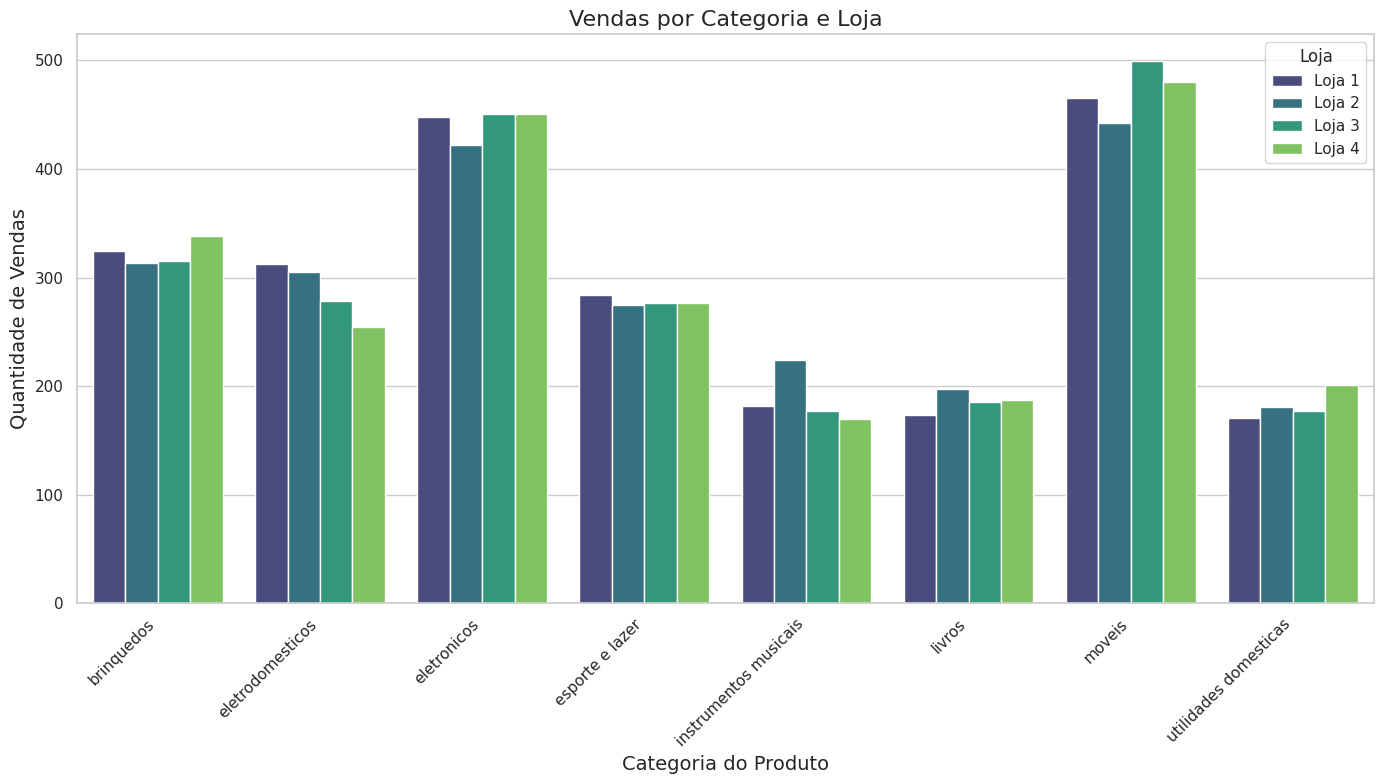

In [13]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Categoria do Produto', y='Quantidade', hue='Loja', data=categorias_vendas, palette='viridis')
plt.title('Vendas por Categoria e Loja', fontsize=16)
plt.xlabel('Categoria do Produto', fontsize=14)
plt.ylabel('Quantidade de Vendas', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loja')
plt.tight_layout()
plt.show()

> ⬇️ Sobre o gráfico:<br><br>
> Cada barra representa uma categoria de produto, e a altura da barra representa a quantidade de vendas. As cores diferentes das barras representam as as quatro unidades de negócio do sr. João. <br>
> A respresenta visual possibilita, facilmente, comparar as vendas de cada categoria de produto em cada loja e identificar quais produtos são mais populares em cada uma delas.<br>
> Uma avaliação visual identifica que quando a variável target é a categoria móveis o ranking das lojas com maior venda é a loja 3.<br>
> Ao analisar a categoria eletrônicos, as lojas 3 e 4 apresentam vendas bem similares.



---



> ⬇️ Criando gráficos de pizza para as categorias mais vendidas em cada loja

⬇️ Criando gráficos de pizza para as categorias mais vendidas em cada loja.



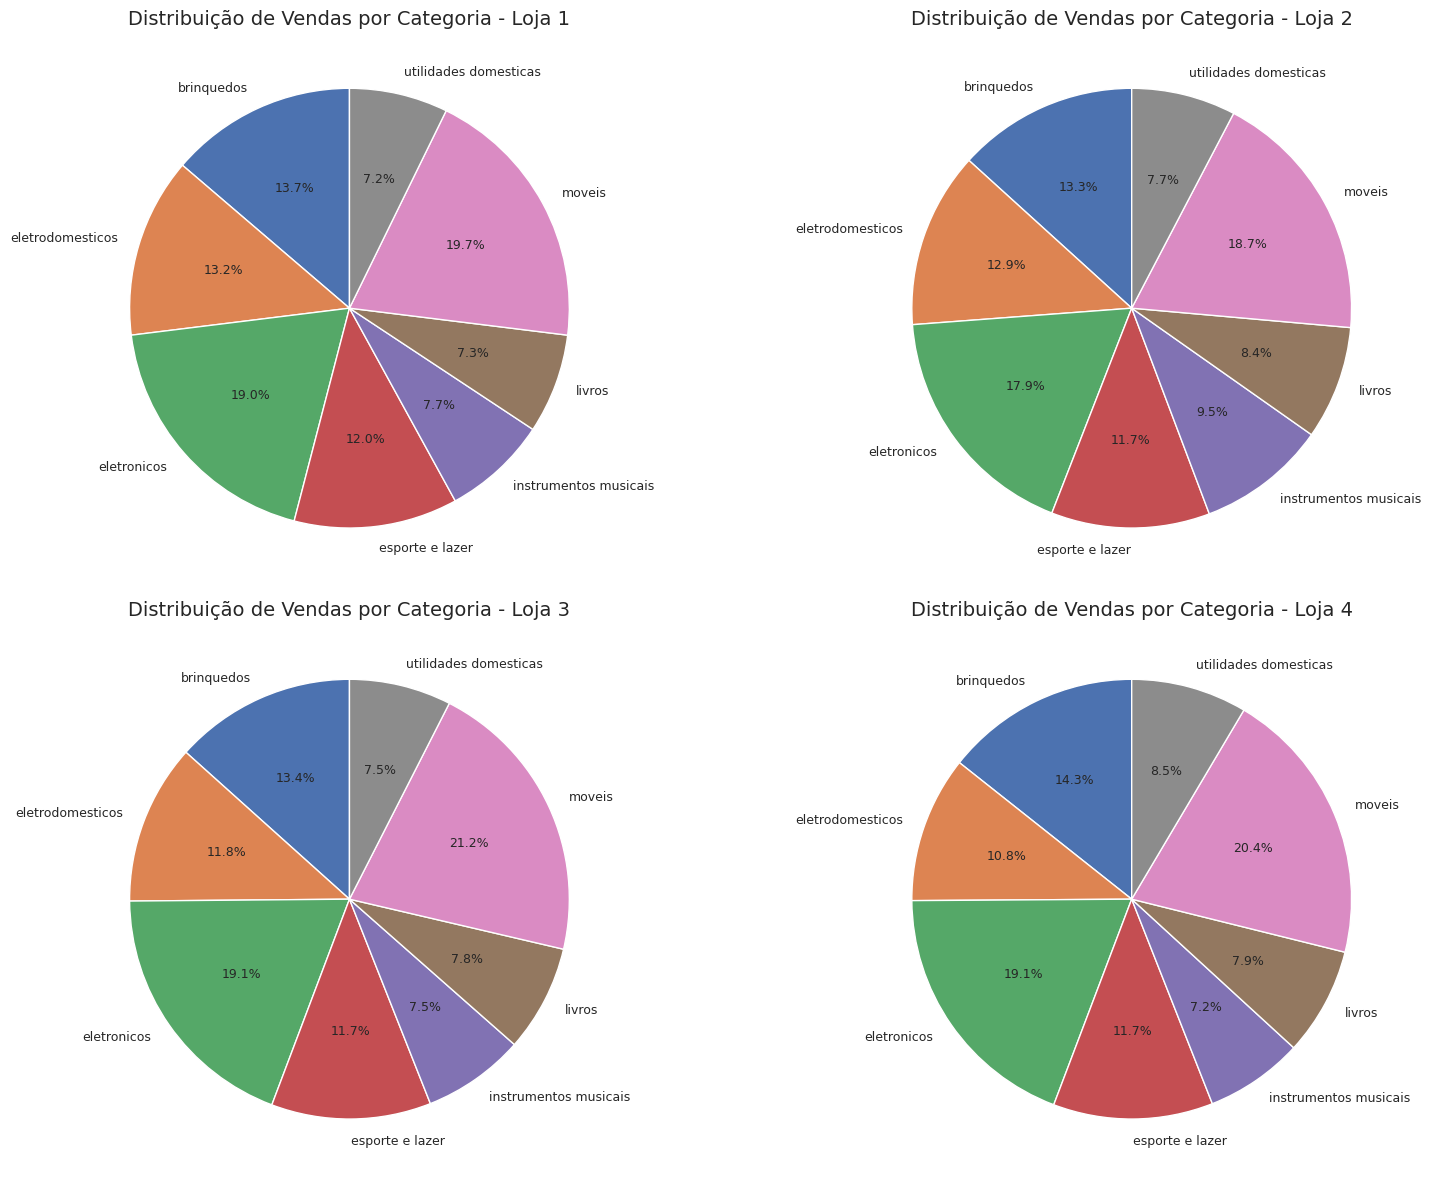

In [14]:
print("⬇️ Criando gráficos de pizza para as categorias mais vendidas em cada loja.")
print()
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, loja in enumerate(lojas):
    dados_loja = categorias_vendas[categorias_vendas['Loja'] == loja]
    ax = axes[i]
    wedges, texts, autotexts = ax.pie(
        dados_loja['Quantidade'],
        labels=dados_loja['Categoria do Produto'],
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 9}
    )
    ax.set_title(f'Distribuição de Vendas por Categoria - {loja}', fontsize=14)

plt.tight_layout()
plt.show()



---



## 👩‍💻 Média de Avaliação das Lojas

> ⬇️ Criando função para calcular a média de avaliação por loja
def calcular_avaliacao_media(dados):


In [15]:
print(" ⬇️ Média de Avaliação das Lojas. \n    Avaliação da Compra: Feedback dos clientes.")
print()
def calcular_avaliacao_media(dados):
    avaliacao_media = dados.groupby('Loja')['Avaliação da compra'].mean().reset_index()
    avaliacao_media.columns = ['Loja', 'Avaliação Média']
    return avaliacao_media

avaliacao_lojas = calcular_avaliacao_media(dados_completos)
print("\nAvaliação média por loja:")
print("--------------------------")
display(avaliacao_lojas)

 ⬇️ Média de Avaliação das Lojas. 
    Avaliação da Compra: Feedback dos clientes.


Avaliação média por loja:
--------------------------


,Loja,Avaliação Média
0,Loja 1,3.976685
1,Loja 2,4.037304
2,Loja 3,4.048326
3,Loja 4,3.995759




---



> 👩‍💻 Visualização da avaliação média

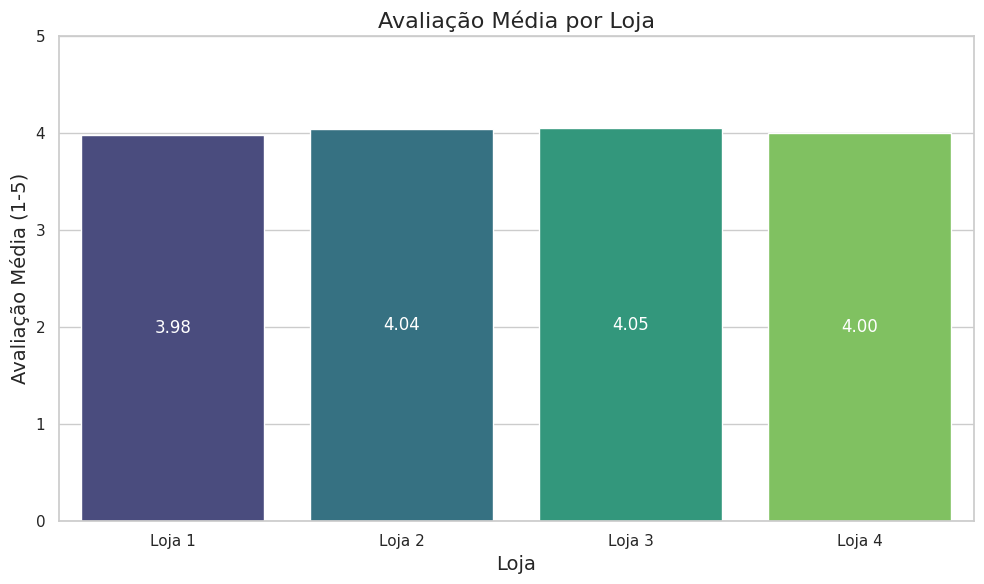

In [16]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Loja', y='Avaliação Média', data=avaliacao_lojas, hue='Loja', palette='viridis', legend=False)
plt.title('Avaliação Média por Loja', fontsize=16)
plt.xlabel('Loja', fontsize=14)
plt.ylabel('Avaliação Média (1-5)', fontsize=14)
plt.ylim(0, 5)

# Adicionando os valores dentro das barras
for i, valor in enumerate(avaliacao_lojas['Avaliação Média']):
    ax.text(i, valor / 2, f'{valor:.2f}', ha='center', va='center', color='white', fontsize=12)

plt.tight_layout()
plt.show()



---



## 👩‍💻 Produtos Mais e Menos Vendidos

> ⬇️ Identificando os Top 5 produto mais vendido por loja.


Top 5 produtos mais vendidos por loja:


,Loja,Produto,Quantidade
24,Loja 1,Guarda roupas,60
37,Loja 1,Micro-ondas,60
47,Loja 1,TV Led UHD 4K,60
43,Loja 1,Secadora de roupas,58
3,Loja 1,Blocos de montar,56
79,Loja 2,Iniciando em programação,65
88,Loja 2,Micro-ondas,62
52,Loja 2,Bateria,61
91,Loja 2,Pandeiro,58
100,Loja 2,Violão,58


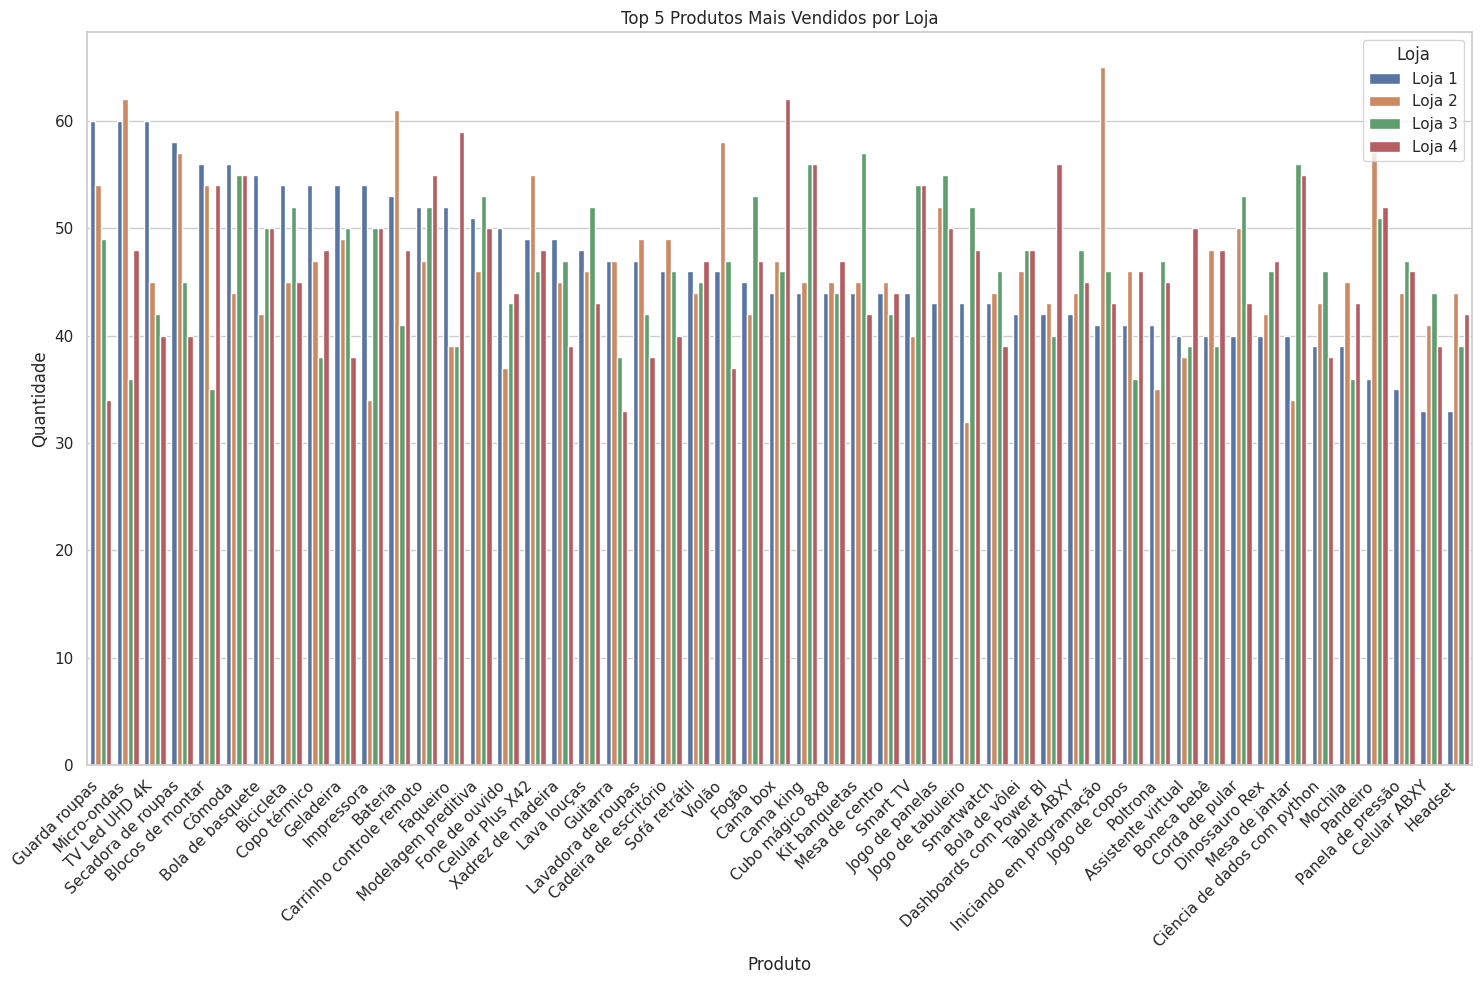

In [17]:
# Criando função para analisar produtos mais e menos vendidos
def analisar_produtos(dados):
    produtos_por_loja = dados.groupby(['Loja', 'Produto']).size().reset_index(name='Quantidade')
    return produtos_por_loja

produtos_vendas = analisar_produtos(dados_completos)

# Top 5 produtos mais vendidos por loja
top_produtos = produtos_vendas.sort_values(['Loja', 'Quantidade'], ascending=[True, False])
produtos_mais_vendidos = top_produtos.groupby('Loja').head(5) # Assign the result to produtos_mais_vendidos
print("\nTop 5 produtos mais vendidos por loja:")
display(produtos_mais_vendidos)

# Criar um gráfico de barras para visualizar os resultados
plt.figure(figsize=(15, 10))
sns.barplot(x='Produto', y='Quantidade', hue='Loja', data=top_produtos)  # Use top_produtos for the plot
plt.title('Top 5 Produtos Mais Vendidos por Loja')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



---



> ⬇️ Produtos menos vendidos por loja

In [18]:
# Produtos menos vendidos por loja
bottom_produtos = produtos_vendas.sort_values(['Loja', 'Quantidade'], ascending=[True, True])
bottom_produtos_por_loja = bottom_produtos.groupby('Loja').head(5)
print("\nTop 5 produtos menos vendidos por loja:")
display(bottom_produtos_por_loja)


Top 5 produtos menos vendidos por loja:


,Loja,Produto,Quantidade
11,Loja 1,Celular ABXY,33
26,Loja 1,Headset,33
41,Loja 1,Panela de pressão,35
40,Loja 1,Pandeiro,36
13,Loja 1,Ciência de dados com python,39
82,Loja 2,Jogo de tabuleiro,32
78,Loja 2,Impressora,34
87,Loja 2,Mesa de jantar,34
93,Loja 2,Poltrona,35
73,Loja 2,Fone de ouvido,37




---



> ⬇️ Produtos menos vendidos por loja - Função Heatmap

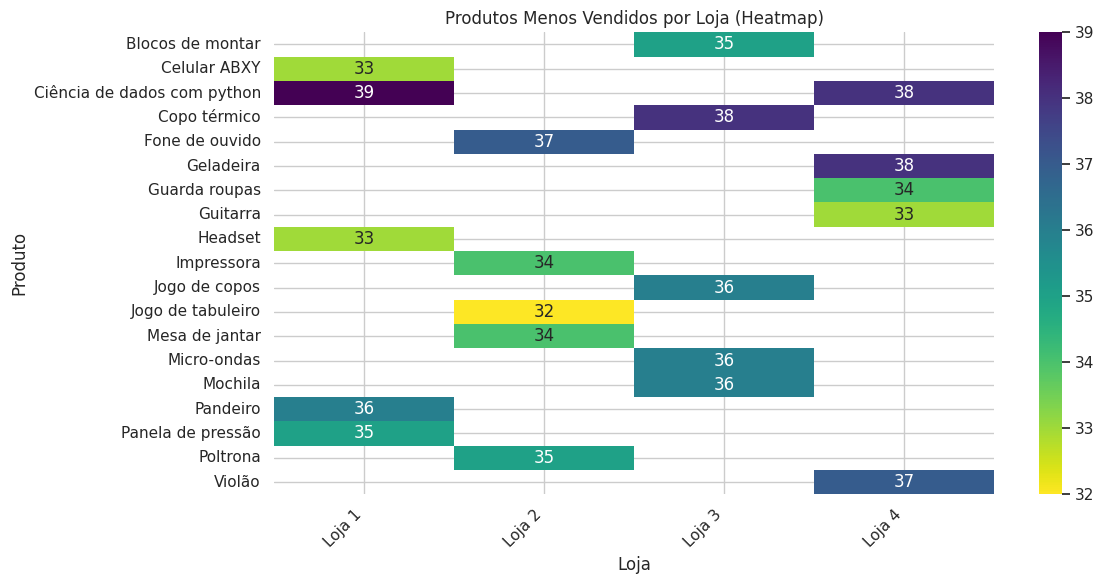

In [19]:
# Pivotar o DataFrame para o formato adequado para o Heatmap
heatmap_data = bottom_produtos_por_loja.pivot(index='Produto', columns='Loja', values='Quantidade')

# Criar o Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis_r', fmt=".0f") # Usamos viridis_r para cores mais escuras em valores menores
plt.title('Produtos Menos Vendidos por Loja (Heatmap)')
plt.xlabel('Loja')
plt.ylabel('Produto')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

> ➡️ Sobre o código:<br><br>


1.Pivotar os dados:<br>
>`heatmap_data = bottom_produtos_por_loja.pivot(index='Produto', columns='Loja', values='Quantidade')` para adequar o DataFrame `bottom_produtos_por_loja` ao formato apropriado ao método - Heatmap. <br>
> Isso cria uma tabela com os produtos como linhas, as lojas como colunas e a quantidade de vendas como valores das células.<br><br>

2.Criar o Heatmap: <br>
>`sns.heatmap(heatmap_data, annot=True, cmap='viridis_r', fmt=".0f")`<br>
>*`annot=True` exibe os valores das vendas nas células.<br>
>*`cmap='viridis_r'` usa a paleta de cores "viridis" invertida `(_r)`, para que cores mais escuras representem valores menores (produtos menos vendidos).<br>
>*`fmt=".0f"` formata os valores das vendas como números inteiros.
Ajustar o gráfico: Configuramos o título, rótulos dos eixos e rotação dos rótulos do eixo X para melhor visualização.<br><br>

Funcionamento do método:<br>

> Cada célula do Heatmap representa a quantidade de vendas de um produto específico em uma loja específica.<br>
> A cor da célula indica a quantidade de vendas, com cores mais escuras representando quantidades menores (produtos menos vendidos).<br>
> Os valores das vendas são exibidos dentro das células para facilitar a leitura.<br>
> Com esta visualização temos os produtos menos vendidos por loja, com cores mais escuras para os produtos com menor quantidade de vendas. A situação da Loja 1 com 2 produtos com a mesma quantidade mínima de vendas é representada por duas células com a mesma cor escura.<br>



---



## 👩‍💻 Frete Médio por Loja

> ⬇️ Criando função para calcular o frete médio por loja

In [20]:
print("➡️ Frete Médio por Loja")
print()
print("↪️ Criando função para calcular o frete médio por loja.")
print()

def calcular_frete_medio(dados):
    frete_medio = dados.groupby('Loja')['Frete'].mean().reset_index()
    frete_medio.columns = ['Loja', 'Frete Médio']
    return frete_medio

frete_lojas = calcular_frete_medio(dados_completos)
print("\nFrete médio por loja:")
display(frete_lojas)

➡️ Frete Médio por Loja

↪️ Criando função para calcular o frete médio por loja.


Frete médio por loja:


,Loja,Frete Médio
0,Loja 1,34.691805
1,Loja 2,33.621941
2,Loja 3,33.074464
3,Loja 4,31.278997




---



> ⬇️ Visualização do frete médio através da função gráfico de barras.

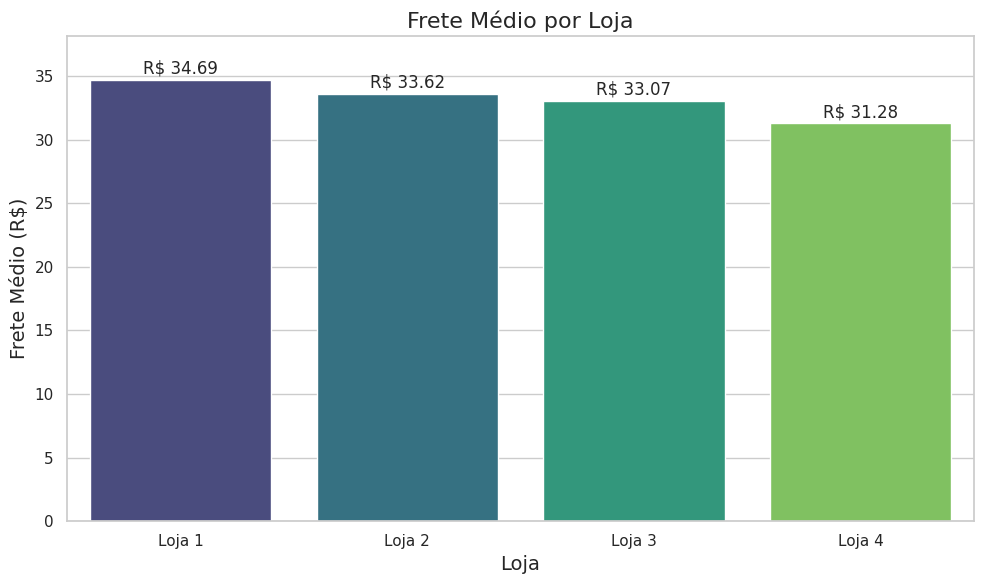

In [21]:
# Ordena as barras por frete médio
frete_lojas = frete_lojas.sort_values('Frete Médio', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Loja', y='Frete Médio', data=frete_lojas, palette='viridis', hue='Loja', legend=False)
plt.title('Frete Médio por Loja', fontsize=16)
plt.xlabel('Loja', fontsize=14)
plt.ylabel('Frete Médio (R$)', fontsize=14)

# Adiciona rótulos com os valores dos fretes médios
for i, valor in enumerate(frete_lojas['Frete Médio']):
    ax.text(i, valor + 0.5, f'R$ {valor:.2f}', ha='center', fontsize=12)

# Ajusta os limites do eixo y
plt.ylim(0, frete_lojas['Frete Médio'].max() * 1.1)

plt.tight_layout()
plt.show()



---



## 👩‍💻 Resumo Comparativo das Lojas



---



> ⬇️ Criando um dataframe de resumo para comparação


In [22]:
resumo_lojas = pd.DataFrame({
    'Loja': faturamento_lojas['Loja'],
    'Faturamento': faturamento_lojas['Faturamento'],
    'Avaliação Média': avaliacao_lojas['Avaliação Média'],
    'Frete Médio': frete_lojas['Frete Médio']
})

> ⬇️ Adicionando a categoria mais vendida

In [23]:
resumo_lojas = pd.merge(resumo_lojas, categorias_mais_vendidas_por_loja[['Loja', 'Categoria do Produto']], on='Loja')
resumo_lojas.rename(columns={'Categoria do Produto': 'Categoria Mais Vendida'}, inplace=True)

> ⬇️ Adicionando o produto mais vendido

In [24]:
resumo_lojas = pd.merge(resumo_lojas, produtos_mais_vendidos[['Loja', 'Produto', 'Quantidade']], on='Loja')
resumo_lojas.rename(columns={'Produto': 'Produto Mais Vendido', 'Quantidade': 'Qtd. Produto Mais Vendido'}, inplace=True)

print("\nResumo comparativo das lojas:")
display(resumo_lojas)


Resumo comparativo das lojas:


,Loja,Faturamento,Avaliação Média,Frete Médio,Categoria Mais Vendida,Produto Mais Vendido,Qtd. Produto Mais Vendido
0,Loja 1,1534509.12,3.976685,34.691805,moveis,Guarda roupas,60
1,Loja 1,1534509.12,3.976685,34.691805,moveis,Micro-ondas,60
2,Loja 1,1534509.12,3.976685,34.691805,moveis,TV Led UHD 4K,60
3,Loja 1,1534509.12,3.976685,34.691805,moveis,Secadora de roupas,58
4,Loja 1,1534509.12,3.976685,34.691805,moveis,Blocos de montar,56
5,Loja 2,1488459.06,4.037304,33.621941,moveis,Iniciando em programação,65
6,Loja 2,1488459.06,4.037304,33.621941,moveis,Micro-ondas,62
7,Loja 2,1488459.06,4.037304,33.621941,moveis,Bateria,61
8,Loja 2,1488459.06,4.037304,33.621941,moveis,Pandeiro,58
9,Loja 2,1488459.06,4.037304,33.621941,moveis,Violão,58


In [25]:
resumo_lojas = pd.merge(resumo_lojas, produtos_mais_vendidos[['Loja', 'Produto', 'Quantidade']], on='Loja')
resumo_lojas.rename(columns={'Produto': 'Produto Mais Vendido', 'Quantidade': 'Qtd. Produto Mais Vendido'}, inplace=True)

print("\nResumo comparativo das lojas:")
print("------------------------------")
display(resumo_lojas)


Resumo comparativo das lojas:
------------------------------


,Loja,Faturamento,Avaliação Média,Frete Médio,Categoria Mais Vendida,Produto Mais Vendido,Qtd. Produto Mais Vendido,Produto Mais Vendido,Qtd. Produto Mais Vendido
0,Loja 1,1534509.12,3.976685,34.691805,moveis,Guarda roupas,60,Guarda roupas,60
1,Loja 1,1534509.12,3.976685,34.691805,moveis,Guarda roupas,60,Micro-ondas,60
2,Loja 1,1534509.12,3.976685,34.691805,moveis,Guarda roupas,60,TV Led UHD 4K,60
3,Loja 1,1534509.12,3.976685,34.691805,moveis,Guarda roupas,60,Secadora de roupas,58
4,Loja 1,1534509.12,3.976685,34.691805,moveis,Guarda roupas,60,Blocos de montar,56
...,...,...,...,...,...,...,...,...,...
95,Loja 4,1384497.58,3.995759,31.278997,moveis,Carrinho controle remoto,55,Cama box,62
96,Loja 4,1384497.58,3.995759,31.278997,moveis,Carrinho controle remoto,55,Faqueiro,59
97,Loja 4,1384497.58,3.995759,31.278997,moveis,Carrinho controle remoto,55,Cama king,56
98,Loja 4,1384497.58,3.995759,31.278997,moveis,Carrinho controle remoto,55,Dashboards com Power BI,56


> ⬇️ Análise de Correlação

> ⬇️ Correlação entre preço, frete e avaliação


Correlação entre preço, frete e avaliação:
--------------------------------------------


,Preço,Frete,Avaliação da compra
Preço,1.000000,0.997711,0.001421
Frete,0.997711,1.000000,0.000749
Avaliação da compra,0.001421,0.000749,1.000000


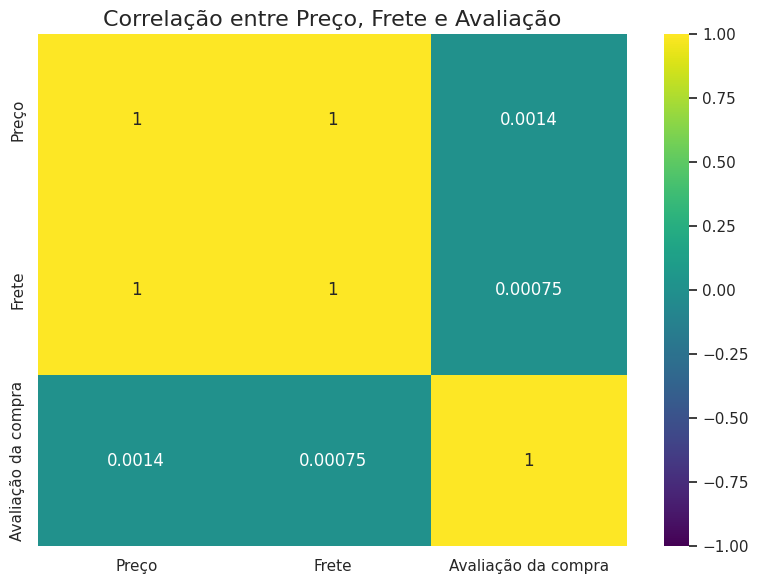

In [26]:
correlacao = dados_completos[['Preço', 'Frete', 'Avaliação da compra']].corr()
print("\nCorrelação entre preço, frete e avaliação:")
print("--------------------------------------------")
display(correlacao)

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlação entre Preço, Frete e Avaliação', fontsize=16)
plt.tight_layout()
plt.show()

> ➡️ Análise de Correlação entre Preço, Frete e Avaliação da Compra. <br><br>

> Analisando os dados da matriz de correlação, observa-se padrões relevantes nas relações entre as variáveis do dataset.

>> **Correlação entre Preço e Frete**<br>
>> **Valor: 0.997711**

> O valor expressa uma correlação extremamente alta e positiva, quase perfeita (próxima de 1), sugerindo que:<br>
> Quando o preço dos produtos aumenta, o valor do frete também aumenta de forma proporcional.<br>
> Há uma relação linear muito forte entre estas duas variáveis.<br>
> Possivelmente, o frete é calculado como um percentual do valor do produto, ou existe alguma política de frete que escala diretamente com o preço.<br>

>> **Correlação entre Preço e Avaliação da Compra**<br>
>> **Valor: 0.001421**<br>

> A correlação entre tais variáveis é, praticamente, inexistente (muito próxima de zero).:<br>
> Não há relação linear entre o preço dos produtos e as avaliações dos clientes.<br>
> Produtos mais caros não necessariamente recebem avaliações melhores ou piores.<br>
> Pode-se sugerir que os clientes avaliam os produtos com base em outros fatores que não o preço.<br>

>> **Correlação entre Frete e Avaliação da Compra**<br>
>> **Valor: 0.000749**<br>

> A correlação acima também é praticamente inexistente, indicando que: <br>
> O valor do frete não influencia as avaliações dos clientes.
> Não há relação linear entre essas variáveis.<br>
> O custo de entrega não parece ser um fator determinante na satisfação do cliente.<br>

> ⬇️ **Implicações para a Análise do Sr. João**<br>

> Estes resultados são importantes para a análise das lojas da Alura Store:<br>
> Política de frete consistente:<br>
> A alta correlação entre preço e frete sugere uma política uniforme de cálculo de frete em todas as lojas.<br>
> Avaliações independentes de preço e frete: <br>
> As avaliações dos clientes não estão relacionadas com preços ou custos de envio, o que sugere que outros fatores como qualidade do produto, atendimento ao cliente ou tempo de entrega podem ter maior impacto na satisfação.<br>

> Tomada de decisão:<br>
> Ao avaliar qual loja vender, o Sr. João deve considerar que o modelo de precificação de frete parece padronizado, e deve focar em outros indicadores de desempenho além da relação preço-frete.<br>

> As informações serão valiosas para complementar as outras análises de faturamento, categorias mais vendidas e avaliações médias das lojas.<br>




---



> ⬇️ Análise de faturamento por região (estado)

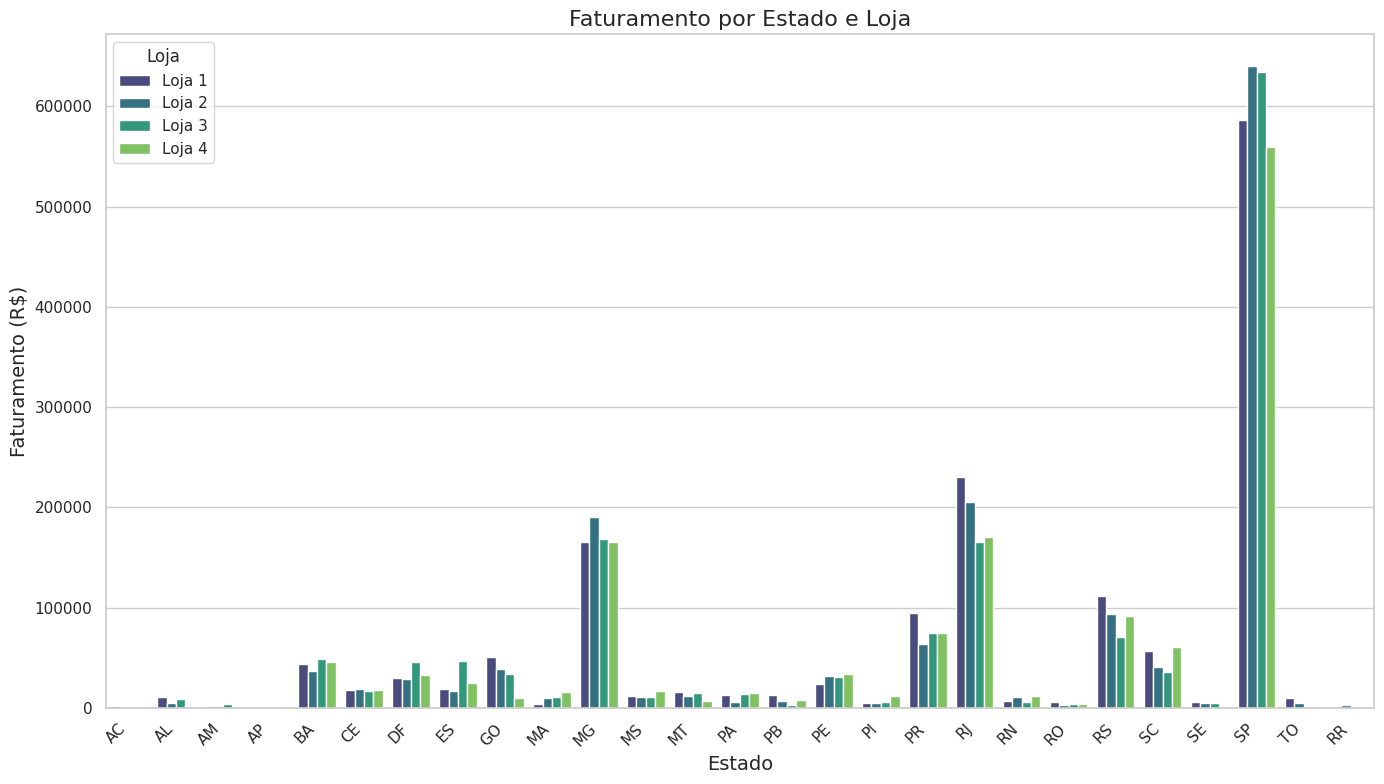

In [27]:
faturamento_por_estado = dados_completos.groupby(['Loja', 'Local da compra'])['Preço'].sum().reset_index()
faturamento_por_estado.columns = ['Loja', 'Estado', 'Faturamento']

plt.figure(figsize=(14, 8))
sns.barplot(x='Estado', y='Faturamento', hue='Loja', data=faturamento_por_estado, palette='viridis')
plt.title('Faturamento por Estado e Loja', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Faturamento (R$)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loja')
plt.tight_layout()
plt.show()

⬇️Sobre o gráfico:<br><br>

> Loja 1, Loja 2, Loja 3 e Loja 4 concorrem agressivamente nos estados mais populosos e de maior potencial de consumo.<br>
> O desempenho entre elas é relativamente equilibrado nesses mercados, demandando diferenciação agressiva para ganhar mais participação.<br>
> Oportunidades de crescimento existem em mercados menos explorados (faturamento baixo e sobreposição pequena), onde a disputa ainda é moderada.<br>

> **Lojas em Disputa Direta nos Principais Estados**<br>

> Os estados de maior faturamento são principalmente São Paulo (SP), Rio de Janeiro (RJ), Minas Gerais (MG), Paraná (PR) e Rio Grande do Sul (RS) — todos apresentam significativa atuação de cada uma das quatro lojas.<br>
As quatro lojas concorrem fortemente nesses estados, sendo que em SP, por exemplo, o faturamento individual de cada loja é bastante elevado, formando claramente um mercado sobreposto e competitivo.
O padrão se repete em RJ, MG, PR, e RS, ainda que com faturamento absoluto menor do que em SP.



---



## 👩‍💻 Análise Geográfica

> ⬇️ Verificando a distribuição geográfica das vendas

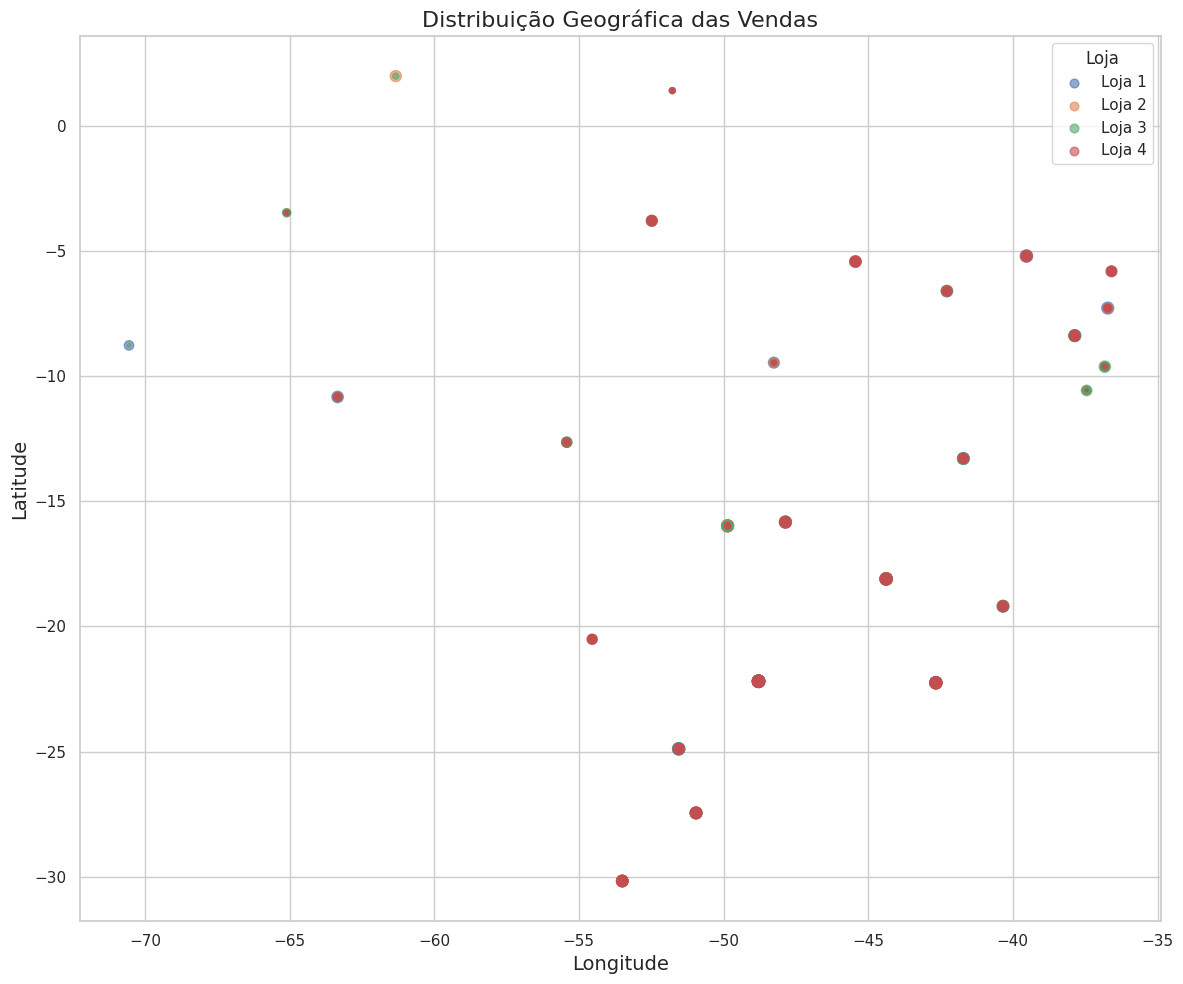

In [28]:
plt.figure(figsize=(12, 10))
for loja in lojas:
    dados_loja = dados_completos[dados_completos['Loja'] == loja]
    plt.scatter(
        dados_loja['lon'],
        dados_loja['lat'],
        alpha=0.6,
        label=loja,
        s=dados_loja['Preço']/50  # Tamanho proporcional ao preço
    )

plt.title('Distribuição Geográfica das Vendas', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.legend(title='Loja')
plt.grid(True)
plt.tight_layout()
plt.show()

> ⬇️ Insights mediante a visualização acima:

> Observações do Gráfico


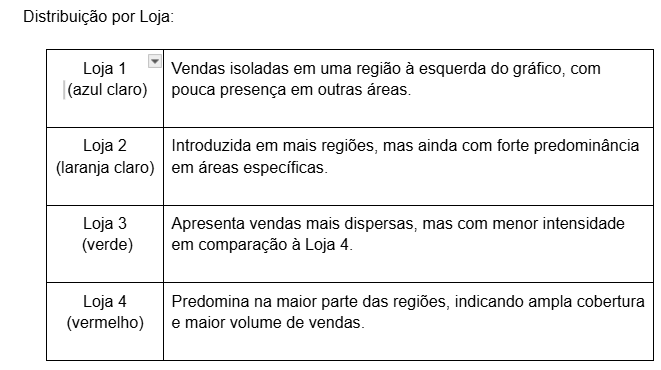






>> **Sobreposição:**<br>

>> Algumas áreas mostram sobreposição de pontos (vendas de várias lojas na mesma latitude e longitude), sugerindo competição entre lojas na região.
Porém, também há regiões dominadas por uma única loja, especialmente pela Loja 4.<br>

>> **Tamanho dos Pontos:**<br>

>> O tamanho dos pontos está relacionado com o preço das vendas, indicando que as transações de maior valor não estão igualmente distribuídas. Algumas áreas possuem maior concentração de vendas de alto valor.<br>

>> **Cobertura Geográfica**:<br>

>> As lojas parecem operar em um espaço geográfico amplo, cobrindo várias latitudes de -30 a 0 e longitudes de -70 a -35.
A maior concentração está nas regiões ao leste (próximo a longitudes de -50 a -40).<br>



> ⬇️ **Insights para Estratégia de Negócios**<br>

>> **Loja mais Promissora:**<br>

>> A Loja 4 apresenta grande dispersão geográfica com volume elevado de vendas em várias regiões, o que pode indicar maior participação de mercado e alcance.
A Loja 1 parece estar mais limitada, com vendas concentradas em uma única região.<br>

>> **Expansão Regional:**<br>

>> Boas oportunidades para expandir para áreas menos saturadas onde há pouca sobreposição de lojas.
As regiões mais ao oeste (longitudes próximas a -70) mostram baixa presença de vendas.<br>


>> **Concorrência Local:**<br>

>> A competição por clientes é mais intensa nas regiões centrais e orientais do gráfico, onde múltiplas lojas atuam.
>> Estratégias específicas podem ser formuladas para melhorar o desempenho em mercados sobrepostos (
onde diferentes lojas ou empresas disputam os mesmos clientes em uma determinada região).

>> **Produtos de Maior Valor:**<br>

>> Regiões com pontos maiores indicam onde produtos de maior preço são vendidos.
Essas áreas podem ser priorizadas para campanhas de marketing e disponibilidade de estoque premium.


>> **Logística e Custos de Operação:**<br>

>> Entender as distâncias e dispersão geográfica ajuda a otimizar custos de transporte e entrega, garantindo eficiência operacional.<br>

>> Em suma o gráfico indica que:<br>
 > * A Loja 4 é a mais dominante, tanto em distribuição geográfica quanto em volume de vendas.<br>
 > * A Loja 3 demonstram potencial de crescimento em áreas específicas. <br>
 > * Já lojas menores (como a Loja 1) podem necessitar de otimização ou reposicionamento estratégico para competir nas regiões mais disputadas.<br>






---



## 👩‍💻 Relatório Final e Recomendação

> ⬇️ Identificação da loja com menor desempenho

> ⬇️ Criando critérios para avaliação

In [29]:
resumo_lojas['Rank Faturamento'] = resumo_lojas['Faturamento'].rank(ascending=True)
resumo_lojas['Rank Avaliação'] = resumo_lojas['Avaliação Média'].rank(ascending=True)
resumo_lojas['Rank Frete'] = resumo_lojas['Frete Médio'].rank(ascending=False)  # Menor frete é melhor (rank maior)

> ⬇️ Pontuação total (soma dos rankings)

In [30]:
resumo_lojas['Pontuação Total'] = resumo_lojas['Rank Faturamento'] + resumo_lojas['Rank Avaliação'] + resumo_lojas['Rank Frete']

display(resumo_lojas[['Loja', 'Faturamento', 'Rank Faturamento',
                     'Avaliação Média', 'Rank Avaliação',
                     'Frete Médio', 'Rank Frete',
                     'Pontuação Total']])

,Loja,Faturamento,Rank Faturamento,Avaliação Média,Rank Avaliação,Frete Médio,Rank Frete,Pontuação Total
0,Loja 1,1534509.12,88.0,3.976685,13.0,34.691805,13.0,114.0
1,Loja 1,1534509.12,88.0,3.976685,13.0,34.691805,13.0,114.0
2,Loja 1,1534509.12,88.0,3.976685,13.0,34.691805,13.0,114.0
3,Loja 1,1534509.12,88.0,3.976685,13.0,34.691805,13.0,114.0
4,Loja 1,1534509.12,88.0,3.976685,13.0,34.691805,13.0,114.0
...,...,...,...,...,...,...,...,...
95,Loja 4,1384497.58,13.0,3.995759,38.0,31.278997,88.0,139.0
96,Loja 4,1384497.58,13.0,3.995759,38.0,31.278997,88.0,139.0
97,Loja 4,1384497.58,13.0,3.995759,38.0,31.278997,88.0,139.0
98,Loja 4,1384497.58,13.0,3.995759,38.0,31.278997,88.0,139.0


> ⬇️ Loja recomendada para venda (menor pontuação total)

In [31]:
loja_recomendada = resumo_lojas.sort_values('Pontuação Total').iloc[0]['Loja']
print(f" ➡️ A loja recomendada para venda é: {loja_recomendada}")

 ➡️ A loja recomendada para venda é: Loja 1


> ⬇️ Visualização da pontuação total

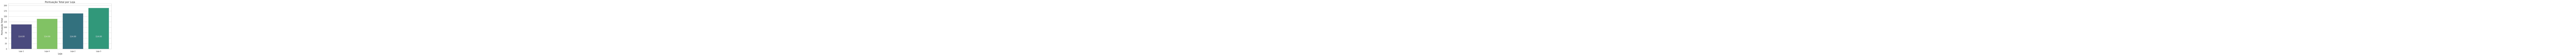

In [32]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Loja', y='Pontuação Total', hue='Loja', data=resumo_lojas, palette='viridis', legend=False,  # Define 'hue' como 'Loja' e desativa a legenda
                 order=resumo_lojas.sort_values('Pontuação Total')['Loja'])
plt.title('Pontuação Total por Loja', fontsize=16)
plt.xlabel('Loja', fontsize=14)
plt.ylabel('Pontuação Total', fontsize=14);

plt.ylim(0, resumo_lojas['Pontuação Total'].max() * 1.1)

# Para exibir a pontuação dentro das barras
for i, valor in enumerate(resumo_lojas['Pontuação Total']):
    ax.text(i, valor / 2, f'{valor:.2f}', ha='center', va='center',
            color='white', fontsize=12)  # Posição, formatação e cor do texto

plt.subplots_adjust(bottom=0.2)

plt.show()



---



> ➡️ PARECER FINAL.  


> A partir do estudo aprofundado dos dados de vendas, feedback dos clientes e métricas de desempenho das quatro lojas da Alura Store, eu, Juliane Borges, na condição de Cientista de Dados formalizo minha recomendação referente à estratégia de venda ao proprietário da rede de lojas Alura Sore - Sr. João.
<br><br>
>> Unidade de negócio a ser vendida: loja 1
<br><br>
> Tendo em vista as informações contidas nos csv`s, inicialmente, "carregados" nessa IDE e manipulados para averiguação dos valores e tomada de decisão como demonstra a tabela abaixo.





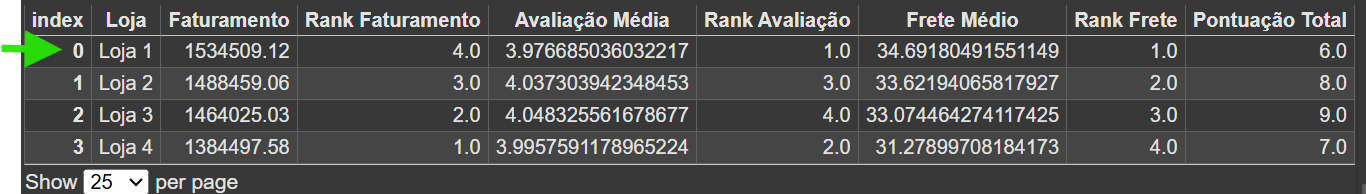

> **Critérios adotados:** <br><br>
> Um sistema de pontuação para ranquear as lojas e identificar a unidade de negócio com a menor pontuação. A pontuação total de cada loja é calculada somando os rankings individuais de três atributos: <br>

> **Faturamento:** As lojas são classificadas pelo seu faturamento, recebendo um rank de 1 a 4, onde 1 representa o maior faturamento e 4 o menor.<br>

> **Avaliação Média:** As lojas são classificadas pela sua avaliação média dos clientes, recebendo um ranking de 1 a 4, onde 1 representa a melhor avaliação e 4 a pior.<br>

> **Frete Médio:** As lojas são classificadas pelo seu frete médio, recebendo um rank de 1 a 4, onde 1 representa o menor frete e 4 o maior.<br>

>  A Loja 1 obteve a menor pontuação total devido seu desempenho inferior nos quesitos -  Avaliação Média e Frete Médio (R$) - , sendo considerada menos competitiva e de maior propensão à venda. <br> Além dos fundamentos, anteriormente mencionados, o estabelecimento 1 - sob a ótica da distribuição geográfica - apresenta vendas concentradas em uma única região o que caracteriza uma certa limitação.